In [2]:
#Exercise 1: Embedding 1
import spacy

# Load the exact model
nlp = spacy.load("en_core_web_sm")

# Process the word "car"
doc = nlp("car")

# spaCy stores vector in token.vector
embedding = doc[0].vector

print("Embedding shape:", embedding.shape)

# Sum of the first 20 values
sum_first_20 = embedding[:20].sum()

# Print using float.as_integer_ratio()
print(sum_first_20.as_integer_ratio())


Embedding shape: (96,)
(12494889, 4194304)


In [3]:
# Exercise 2: Tokenization
import spacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

text = "Tokenize this sentence. And this one too."

# Process text
doc = nlp(text)

# Print tokens
for token in doc:
    print(token.text)


Tokenize
this
sentence
.
And
this
one
too
.



[1] Loading spaCy model en_core_web_md...
✓ Model loaded: core_web_md v3.4.1

[2] Processing sentence: 'laptop computer coffee tea water liquid dog cat kitty'
    Words: ['laptop', 'computer', 'coffee', 'tea', 'water', 'liquid', 'dog', 'cat', 'kitty']

[3] Embeddings shape: (9, 300)
    (Number of words × Embedding dimensions)

[4] Cosine distance matrix shape: (9, 9)

[5] ✓ Heatmap saved as 'cosine_distances_heatmap.png'


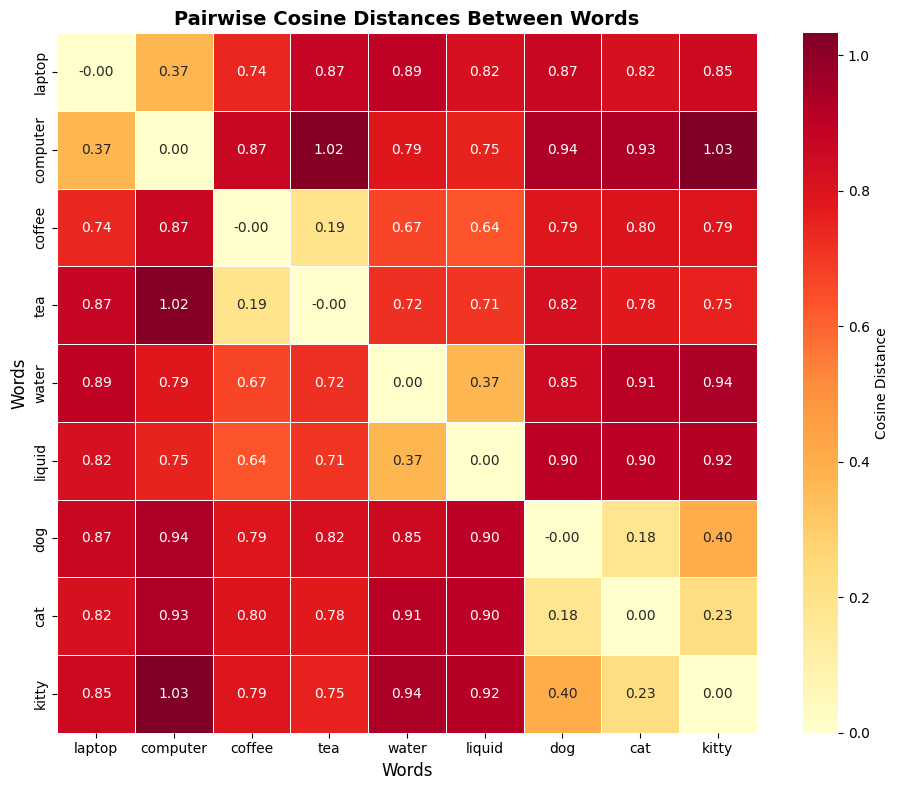

In [3]:
#Exercise 3: Embeddings 2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load the medium model (en_core_web_md)
print("\n[1] Loading spaCy model en_core_web_md...")
nlp_md = spacy.load("en_core_web_md")
print(f"✓ Model loaded: {nlp_md.meta['name']} v{nlp_md.meta['version']}")

# Process the sentence
sentence = "laptop computer coffee tea water liquid dog cat kitty"
print(f"\n[2] Processing sentence: '{sentence}'")

doc = nlp_md(sentence)
words = [token.text for token in doc]
print(f"    Words: {words}")

# 2. Get embeddings for all words
embeddings = np.array([token.vector for token in doc])
print(f"\n[3] Embeddings shape: {embeddings.shape}")
print(f"    (Number of words × Embedding dimensions)")

# 3. Compute pairwise cosine similarity
# Note: cosine_similarity computes similarity, so we convert to distance
cosine_sim = cosine_similarity(embeddings)
cosine_distances = 1 - cosine_sim  # Convert similarity to distance

print(f"\n[4] Cosine distance matrix shape: {cosine_distances.shape}")

# 4. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cosine_distances,
    xticklabels=words,
    yticklabels=words,
    annot=True,
    fmt='.2f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Cosine Distance'},
    square=True,
    linewidths=0.5
)
plt.title('Pairwise Cosine Distances Between Words', fontsize=14, fontweight='bold')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.savefig('cosine_distances_heatmap.png', dpi=300, bbox_inches='tight')
print("\n[5] ✓ Heatmap saved as 'cosine_distances_heatmap.png'")
plt.show()

In [9]:
# Exercise 4: Sentences' similarity
"""
GOAL: Compute similarity between sentences using spaCy word embeddings.

CONCEPT: 
The word embedding of a full sentence is the average of all word embeddings
in that sentence. This is how spaCy's .similarity() method works.

USE CASE: 
Detect user intentions (e.g., "buy shoes") to trigger targeted advertisements
or actions in a chatbot/e-commerce system.
"""

import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nlp = spacy.load("en_core_web_sm")

# Define the sentences
sentence_1 = "I want to buy shoes"
sentence_2 = "I would love to purchase running shoes"
sentence_3 = "I am in my room"

# Process sentences with spaCy
doc1 = nlp(sentence_1)
doc2 = nlp(sentence_2)
doc3 = nlp(sentence_3)

# Compute the 3 pairwise similarities
sim_1_2 = doc1.similarity(doc2)
sim_1_3 = doc1.similarity(doc3)
sim_2_3 = doc2.similarity(doc3)

print("\n Pairwise Similarity Scores:")
print(f"Similarity (Sentence 1 ↔ Sentence 2): {sim_1_2:.4f}")
print(f"    '{sentence_1}'")
print(f"    '{sentence_2}'")
print()
print(f"Similarity (Sentence 1 ↔ Sentence 3): {sim_1_3:.4f}")
print(f"    '{sentence_1}'")
print(f"    '{sentence_3}'")
print()
print(f"Similarity (Sentence 2 ↔ Sentence 3): {sim_2_3:.4f}")
print(f"    '{sentence_2}'")
print(f"    '{sentence_3}'")


 Pairwise Similarity Scores:
Similarity (Sentence 1 ↔ Sentence 2): 0.6592
    'I want to buy shoes'
    'I would love to purchase running shoes'

Similarity (Sentence 1 ↔ Sentence 3): 0.4167
    'I want to buy shoes'
    'I am in my room'

Similarity (Sentence 2 ↔ Sentence 3): 0.2896
    'I would love to purchase running shoes'
    'I am in my room'


/tmp/ipykernel_18410/4043097592.py:32: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  sim_1_2 = doc1.similarity(doc2)
/tmp/ipykernel_18410/4043097592.py:33: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger

In [11]:
# Exercise 5: NER
"""
GOAL: Learn to use Named Entity Recognition to detect and classify entities.

NER Use Cases:
- Information extraction from documents
- Entity disambiguation (apple fruit vs Apple company)
- Content classification and tagging
- Question answering systems
- Knowledge graph construction
"""

import spacy
from spacy import displacy
import pandas as pd

# Load the language model
print("=" * 80)
print("NAMED ENTITY RECOGNITION (NER) EXERCISE")
print("=" * 80)

print("\n[Loading Model]")
nlp = spacy.load("en_core_web_sm")
print(f"✓ Model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

# ============================================================================
# PART 1: Extract Named Entities from Apple Inc. Text
# ============================================================================

print("\n" + "=" * 80)
print("PART 1: EXTRACT NAMED ENTITIES")
print("=" * 80)

text_1 = """Apple Inc. is an American multinational technology company headquartered in Cupertino, California, that designs, develops, and sells consumer electronics, computer software, and online services. It is considered one of the Big Five companies in the U.S. information technology industry, along with Amazon, Google, Microsoft, and Facebook. Apple was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in April 1976 to develop and sell Wozniak's Apple I personal computer, though Wayne sold his share back within 12 days. It was incorporated as Apple Computer, Inc., in January 1977, and sales of its computers, including the Apple I and Apple II, grew quickly."""

print("\n[1] Processing text:")
print("-" * 80)
print(f"{text_1[:150]}...")

# Process the text
doc1 = nlp(text_1)

# Extract named entities
print("\n[2] Extracted Named Entities:")
print("-" * 80)
print(f"{'Entity':<30} {'Label':<15} {'Description'}")
print(f"{'-'*30} {'-'*15} {'-'*40}")

entities_list = []
for ent in doc1.ents:
    # Get entity explanation
    explanation = spacy.explain(ent.label_)
    print(f"{ent.text:<30} {ent.label_:<15} {explanation}")
    
    entities_list.append({
        'Entity': ent.text,
        'Label': ent.label_,
        'Description': explanation
    })

print(f"\n✓ Total entities found: {len(doc1.ents)}")

# Create a summary by entity type
print("\n[3] Entity Type Summary:")
print("-" * 80)

entity_counts = {}
for ent in doc1.ents:
    if ent.label_ not in entity_counts:
        entity_counts[ent.label_] = []
    entity_counts[ent.label_].append(ent.text)

for label, entities in sorted(entity_counts.items()):
    print(f"\n{label} ({spacy.explain(label)}):")
    print(f"  Count: {len(entities)}")
    print(f"  Entities: {', '.join(set(entities))}")






# PART 2: Entity Disambiguation - "apple" Example
print("\n" + "=" * 80)
print("PART 2: ENTITY DISAMBIGUATION")
print("=" * 80)

text_2 = "Paul eats an apple while watching a movie on his Apple device."

print("\n[1] Sentence to analyze:")
print("-" * 80)
print(f"'{text_2}'")

print("\n[2] Disambiguation Challenge:")
print("-" * 80)
print("• First 'apple' → fruit (common noun, NOT an entity)")
print("• Second 'Apple' → company (named entity)")

# Process the sentence
doc2 = nlp(text_2)

print("\n[3] Named Entities Detected:")
print("-" * 80)

if len(doc2.ents) > 0:
    print(f"{'Entity':<20} {'Start Char':<12} {'End Char':<12} {'Label':<12} {'Description'}")
    print(f"{'-'*20} {'-'*12} {'-'*12} {'-'*12} {'-'*30}")
    
    for ent in doc2.ents:
        explanation = spacy.explain(ent.label_)
        print(f"{ent.text:<20} {ent.start_char:<12} {ent.end_char:<12} {ent.label_:<12} {explanation}")
else:
    print("No named entities detected.")

# Show detailed token analysis
print("\n[4] Detailed Token Analysis:")
print("-" * 80)
print(f"{'Token':<15} {'Position':<12} {'Entity Type':<15} {'Is Entity?'}")
print(f"{'-'*15} {'-'*12} {'-'*15} {'-'*10}")

for token in doc2:
    entity_type = token.ent_type_ if token.ent_type_ else "NOT_ENTITY"
    is_entity = "Yes" if token.ent_type_ else "No"
    position = f"{token.idx}-{token.idx + len(token.text)}"
    print(f"{token.text:<15} {position:<12} {entity_type:<15} {is_entity}")

# Highlight the disambiguation
print("\n[5] Disambiguation Result:")
print("-" * 80)

apple_occurrences = []
for i, token in enumerate(doc2):
    if token.text.lower() == "apple":
        apple_occurrences.append({
            'Position': i,
            'Text': token.text,
            'Start_Char': token.idx,
            'End_Char': token.idx + len(token.text),
            'Is_Entity': bool(token.ent_type_),
            'Entity_Type': token.ent_type_ if token.ent_type_ else "None",
            'Interpretation': "Company" if token.ent_type_ else "Fruit"
        })

print(f"\nFound {len(apple_occurrences)} occurrence(s) of 'apple/Apple':\n")

for occ in apple_occurrences:
    print(f"Occurrence {occ['Position'] + 1}:")
    print(f"  Text: '{occ['Text']}'")
    print(f"  Character span: {occ['Start_Char']}-{occ['End_Char']}")
    print(f"  Is Named Entity: {occ['Is_Entity']}")
    print(f"  Entity Type: {occ['Entity_Type']}")
    print(f"  → Interpretation: {occ['Interpretation']}")
    print()

NAMED ENTITY RECOGNITION (NER) EXERCISE

[Loading Model]
✓ Model loaded: core_web_sm v3.4.1

PART 1: EXTRACT NAMED ENTITIES

[1] Processing text:
--------------------------------------------------------------------------------
Apple Inc. is an American multinational technology company headquartered in Cupertino, California, that designs, develops, and sells consumer electron...

[2] Extracted Named Entities:
--------------------------------------------------------------------------------
Entity                         Label           Description
------------------------------ --------------- ----------------------------------------
Apple Inc.                     ORG             Companies, agencies, institutions, etc.
American                       NORP            Nationalities or religious or political groups
Cupertino                      GPE             Countries, cities, states
California                     GPE             Countries, cities, states
Five                           CA

In [13]:
# Exercise 6: Part-of-speech tags
import spacy
nlp = spacy.load("en_core_web_sm")

with open("news_amazon.txt") as f:
    text = f.read()

doc = nlp(text)

for sent in doc.sents:
    for token in sent:
        if token.text == "Bezos" and token.tag_ == "NNP":
            print(sent.text)
            break


Amazon CEO Jeff Bezos announced record profits today.
The company, led by Bezos, 
has seen unprecedented growth in the e-commerce sector.
Bezos stated that customer 
satisfaction remains the top priority.
Industry analysts believe Bezos has 
revolutionized online retail.
The billionaire entrepreneur Bezos continues to 
invest in space exploration through Blue Origin.
Critics argue that Bezos should 
focus more on worker conditions.
Meanwhile, Bezos remains one of the world's 
wealthiest individuals.
Amazon's stock price surged after Bezos revealed new 
initiatives.
Shareholders praised Bezos for his strategic vision.
The leadership 
of Bezos has been both celebrated and criticized.
